In [47]:
import numpy as np
import pandas as pd

from glob import glob
# import os
%pylab inline

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [12]:
# Выберем регион около Empire State Building: 1231 - 3
test_region = 1231-3

In [60]:
# %%time
# df = pd.DataFrame()
# files = glob('aggr_yellow_tripdata_????-??.bin')
# for fname in files:
#     df_tmp = pd.read_pickle(fname)
#     df = df.append(df_tmp[df_tmp['region'] == test_region])
#     print(fname)
    
# print('finish') 

In [61]:
# df.to_pickle('aggr_yellow_tripdata_w3.bin')
df = pd.read_pickle('aggr_yellow_tripdata_w3.bin')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21167 entries, 483727 to 1858727
Data columns (total 3 columns):
datetime    21167 non-null datetime64[ns, UTC]
region      21167 non-null int64
count       21167 non-null float64
dtypes: datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 661.5 KB


In [63]:
df.head()

,datetime,region,count
483727,2014-01-01 00:00:00+00:00,1228,863.0
906227,2014-01-01 01:00:00+00:00,1228,866.0
486227,2014-01-01 02:00:00+00:00,1228,888.0
908727,2014-01-01 03:00:00+00:00,1228,815.0
911227,2014-01-01 04:00:00+00:00,1228,718.0


In [64]:
dmin, dmax = df.datetime.min(), df.datetime.max()
print('Рассматриваемый интервал: {:%d.%m.%Y %H:%M} - {:%d.%m.%Y %H:%M}'.format(dmin, dmax))
print('расчетное количество часов в интервале: {:n}'.format( (dmax - dmin).total_seconds() / 3600 ))
print('Количество записей в DataFrame        : {:n}'.format(len(df)))

Рассматриваемый интервал: 01.01.2014 00:00 - 31.05.2016 23:00
расчетное количество часов в интервале: 21167
Количество записей в DataFrame        : 21167


In [65]:
df_plot = df.set_index('datetime')

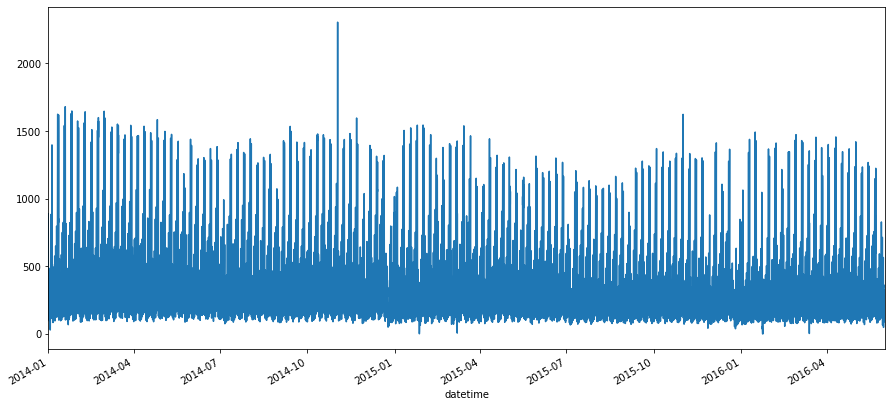

In [66]:
plt.figure(figsize(15,7))
df_plot['count'].plot()

Курс 5 - Прогнозирование временных рядов  
1-1.Prognozirovanie-vremennyh-ryadov.pdf


dminik5_w1_01